In [1]:
import json
import networkx as nx

In [2]:
with open('adj_list.csv') as json_file:
    adj_list = json.load(json_file)
net = nx.Graph(adj_list)

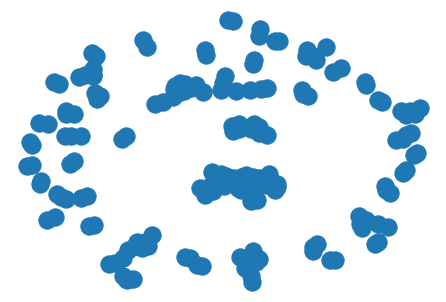

In [3]:
nx.draw(net)

In [4]:
net

In [10]:
net['S36.1']

AtlasView({'S70.2': {'weight': 1}})

In [62]:
def findnodes(graph, source_node, degree, number):
    '''
    this function is to 
    - print out all of the nodes associated to the source node corresponding the number of connected edges
    - plot the subgraph from the overall graph containing the source_node

    input: 
    graph: networkx graph
    source_node: source node name
    degree: number of edges in between the source_node and the returned node
    number: number of nodes to be returned

    output: nodes which satisfy requirments as specified above

    note: essentially the idea is to extract a subgraph coming from that node
    the result of this could be further verified by using nx.descendants(graph, source_node)
    '''
    result_nodes = {}
    all_nodes = [source_node]
    neighbors = [x for x in graph.neighbors(source_node)]
    all_nodes.extend(neighbors)
    cur_num_edge = 1
    result_nodes[cur_num_edge] = neighbors
    while len(neighbors) != 0 and cur_num_edge <= degree:
        temp = []
        cur_num_edge += 1
        for node in neighbors:
            temp.extend([x for x in graph.neighbors(node) if x not in all_nodes])
            all_nodes.extend(temp)
        if len(temp)!=0:
            result_nodes[cur_num_edge] = temp
        neighbors = temp
    nx.draw(graph.subgraph(nx.shortest_path(graph.to_undirected(),source_node)),with_labels = True)
    
    return result_nodes

In [63]:
nx.descendants(net,'S75.0')

{'S30.8', 'S71.1'}

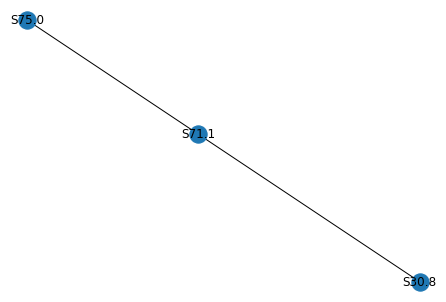

In [64]:
 nx.draw(net.subgraph(nx.shortest_path(net.to_undirected(),'S75.0')),with_labels = True)


1


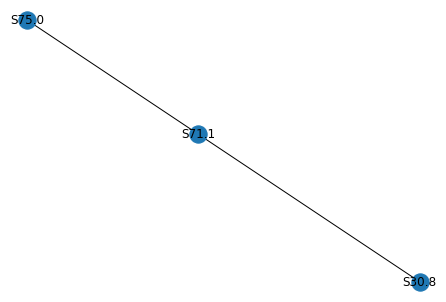

In [65]:
k = findnodes(net,'S71.1',10,_)

In [66]:
k

{1: ['S30.8', 'S75.0']}